3.During the star formation, a gaseous disk forms around the young star. Since planets will form inside this disk, it is called the protoplanetary disks. The simplest model for studying the evolution of this disk is called the viscous disk model

\begin{equation}
\frac{\partial \Sigma}{\partial t}=\frac{3}{R}\frac{\partial}{\partial R}\left[R^{1/2}\frac{\partial}{\partial R}(\nu\Sigma R^{1/2})\right]
\end{equation}
Where R is the distance to the star, $\Sigma$ is the disk's surface density, and $\nu$ is the viscosity of the disk.
This equation is similar to the thermal diffusion equation. Use the method we learned in this class to solve this equation. Initialize the disk surface density with a gaussian at R=1. $\sigma$ for the gaussian is 0.1. Choose $\nu$=1. The simulation domain is from 0.1 to 2. At both boundary set the surface density to be 0 all the time. Choose the timestep of 0.1$\Delta$r$^2/\nu$ to be stable. Run your simulation to t=0.1 to see how the surface density evolves. 

In [0]:
print (e)

2.718281828459045


1.92364965667661e-22


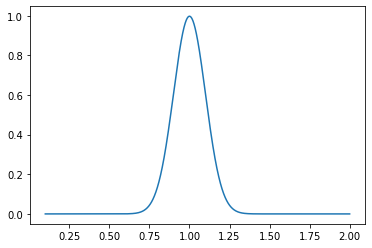

In [1]:
from numpy import *
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D 

def gaussian (x, sigma, mu):  #gaussian normalized at 1
    sqroot = sqrt(2*pi*sigma*sigma)
    exponent = (-0.5)*((x-mu-1)/sigma)**2 
    return ((1/sqroot)*e**(exponent)) 


sigma = 0.1
mu = 0
l = arange(0.1,2,1e-6)
plt.plot(l,gaussian(l,sigma,mu)/4)
plt.show

print(gaussian(0,sigma,mu)/4)

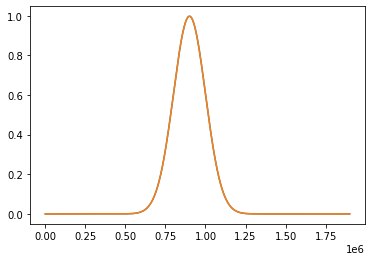

In [5]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;



def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = n+1
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]


def CN(Nx, Dt):
    tend=0.1; Dtout=100.; Dx = 3./(Nx-1);                
    R = 1.0;  v = 1.0                                                                                              
    T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
    xarr = zeros(Nx,float)                                    

    l = arange(0.1,2,1e-6)
    T = gaussian(l,sigma,mu)/4
     
    cons = 3/R*Dx*(sqrt(R)*Dx*(v*sqrt(R)))
    m = 1      

    n   = Nx-1
    Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
    Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
    c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)

    for i in range(1, n+1):  Td[i] = 2. + 2./cons
    for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

    t=0.
    while t < tend:     
        for i in range(1,n): Tb[i] = T[i-1] + T[i+1] + (2./cons-2.) * T[i]
        Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
        for i in range(1, n+1):  T[i] = x[i]                                                                                 
        t+=Dt
 
        p.plot(T)
    p.show()

CN(101,5e-2)